In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
#导入数据集
data = pd.read_csv(r"boston_housing,csv1")

In [66]:
#创建类
class LR :
    #最小二乘法
    def fit(self,X,y) :
        X = np.asmatrix(X.copy())
        y = np.asmatrix(y).reshape(-1,1)
        self.w_ = (X.T * X).I * X.T * y
        
    def predict(self,X) :
        X = np.asmatrix(X.copy())
        result = X * self.w_
        return np.asarray(result).ravel() #拉成一维数组

In [67]:
# 不考虑截距的情况
t = data.sample(len(data),random_state=0)
#拆分训练集与测试集
train_X = t.iloc[:400,:-1]
train_y = t.iloc[:400,-1]
test_X = t.iloc[400:,:-1]
test_y = t.iloc[400:,-1]



In [68]:
#考虑截距的情况

t = data.sample(len(data),random_state=0)

new_columns = t.columns.insert(0,"Intercept")
t = t.reindex(columns=new_columns,fill_value=1)

#拆分训练集与测试集
train_X = t.iloc[:400,:-1]
train_y = t.iloc[:400,-1]
test_X = t.iloc[400:,:-1]
test_y = t.iloc[400:,-1]

In [69]:
lr = LR()
lr.fit(train_X,train_y)
result = lr.predict(test_X)

In [70]:
display(result)
print(np.mean((result - test_y)**2))
display(lr.w_)

array([35.65646237, 32.83903332,  8.83350682, 11.20702792, 22.51913553,
       34.86170663, 17.03039646, 19.17276535, 15.40417037, 26.37296269,
       40.24760182, 25.67054966, 41.52556183, 25.24204426, 23.07696889,
       10.49565648, 12.66091028, 15.02291933, 19.10455413,  3.68126213,
       27.74205006, 26.47698727, 39.98929633, 20.70343619, 19.87350682,
       34.44125993, 33.35035731, 10.17682645, 25.5050863 , 42.37061767,
       17.34084881, 18.69914872, 25.74297788, 18.76370703,  6.63748034,
       20.54645572, 32.73110441, 16.69675938, 23.38181642, 14.61948746,
       24.63111633, 19.80330036, 17.97449101, 18.48150234, 33.63363469,
       19.98323486, 31.93774896, 32.40824778, 38.19431409, 18.09246809,
       17.45700234, 35.99668904, 18.73080103,  8.80667022, 14.99560567,
       25.39495095, 20.61687654, 17.27177846, 27.74199974, 13.44588922,
        6.27339364, 19.97439873,  7.68818197, 27.13676672,  2.03528469,
       29.68282546, 32.13246659, 23.05198499, 17.66148623, 18.79

18.093813702103446


matrix([[ 4.07173882e+01],
        [-1.14429802e-01],
        [ 4.18143126e-02],
        [ 2.14498814e-02],
        [-1.90409118e+01],
        [ 3.29621198e+00],
        [ 8.42119395e-03],
        [-1.40935123e+00],
        [ 3.96332470e-01],
        [-1.67183229e-02],
        [-9.01493735e-01],
        [ 8.52014776e-03],
        [-5.72551156e-01]])

In [71]:
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

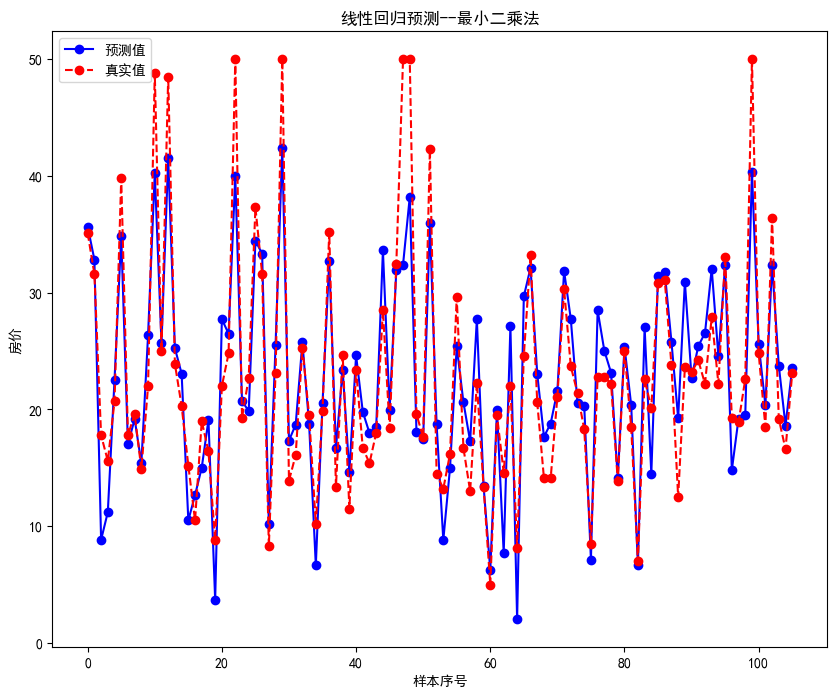

In [72]:
plt.figure(figsize=(10,8))
plt.plot(result,"bo-",label="预测值")
plt.plot(test_y.values,"ro--",label="真实值")
plt.xlabel("样本序号")
plt.ylabel("房价")
plt.title("线性回归预测--最小二乘法")
plt.legend()
plt.show()